In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,cohen_kappa_score
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score


In [3]:
df = pd.read_csv('finaldata.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,DISBURSED_AMOUNT,ASSET_COST,LTV,PERFORM_CNS_SCORE,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_CURRENT_BALANCE,...,NO_OF_INQUIRIES,PERFORM_CNS_SCORE_DESCRIPTION,EMPLOYMENT_TYPE,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,LOAN_DEFAULT
0,0,0.000000,0.038125,0.013442,0.935860,0.000000,0.064710,0.00000,0.00000,0.015698,...,0.866213,0.231313,0.203458,0.048586,0.000236,0.24287,0.000077,0.143703,0.000232,0
1,1,0.000004,0.034612,0.017934,0.743792,0.671910,0.064978,0.00005,0.00005,0.015698,...,0.866213,0.272629,0.227657,0.048586,0.000236,0.24287,0.000030,0.143703,0.000232,1
2,2,0.000009,0.040888,0.015302,0.936801,0.000000,0.064710,0.00000,0.00000,0.015698,...,0.866213,0.231313,0.227657,0.048586,0.000236,0.24287,0.000202,0.143703,0.000232,0
3,3,0.000013,0.045222,0.018287,0.923267,0.342697,0.064710,0.00000,0.00000,0.015698,...,0.095581,0.280423,0.227657,0.048586,0.000236,0.24287,0.000064,0.143703,0.000232,1
4,4,0.000017,0.039967,0.014636,0.922208,0.000000,0.064710,0.00000,0.00000,0.015698,...,0.095581,0.231313,0.227657,0.048586,0.000236,0.24287,0.000060,0.143703,0.000232,1


In [4]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV',
       'PERFORM_CNS_SCORE', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'AGE', 'MOBILENO_AVL_FLAG',
       'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG',
       'PASSPORT_FLAG', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'EMPLOYMENT_TYPE', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'STATE_ID',
       'EMPLOYEE_CODE_ID', 'LOAN_DEFAULT'],
      dtype='object')

In [5]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis = 1)

In [6]:
df.dtypes

DISBURSED_AMOUNT                       float64
ASSET_COST                             float64
LTV                                    float64
PERFORM_CNS_SCORE                      float64
PRI_CURRENT_BALANCE                    float64
PRI_SANCTIONED_AMOUNT                  float64
PRI_DISBURSED_AMOUNT                   float64
SEC_CURRENT_BALANCE                    float64
SEC_SANCTIONED_AMOUNT                  float64
SEC_DISBURSED_AMOUNT                   float64
PRIMARY_INSTAL_AMT                     float64
SEC_INSTAL_AMT                         float64
AVERAGE_ACCT_AGE                       float64
CREDIT_HISTORY_LENGTH                  float64
AGE                                    float64
MOBILENO_AVL_FLAG                      float64
AADHAR_FLAG                            float64
PAN_FLAG                               float64
VOTERID_FLAG                           float64
DRIVING_FLAG                           float64
PASSPORT_FLAG                          float64
PRI_NO_OF_ACC

In [34]:
df['LOAN_DEFAULT'].value_counts()

0    182543
1     50611
Name: LOAN_DEFAULT, dtype: int64

In [7]:
x=df.drop('LOAN_DEFAULT',axis=1)

In [8]:
y = df[['LOAN_DEFAULT']]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(163207, 38)
(69947, 38)
(163207, 1)
(69947, 1)


#### PCA

In [11]:
cov_mat = np.cov(x.T)
cov_mat[0:5]

array([[ 1.76179276e-04,  1.18885737e-04,  6.74246674e-04,
         5.75749814e-05,  1.90421383e-06,  1.98404079e-07,
         2.02358577e-07, -2.60941055e-07, -4.27174978e-07,
        -4.13541221e-07,  1.84114213e-07, -2.73477626e-07,
         2.28482028e-06,  1.08634521e-05, -1.51918915e-04,
         0.00000000e+00, -5.15899985e-05, -4.31529883e-05,
        -3.87066372e-05, -2.63260803e-06, -5.04899062e-06,
        -7.57898264e-05, -1.09478910e-04, -7.30574626e-05,
        -7.57898264e-05,  2.56588899e-05,  6.27183394e-06,
        -1.15575682e-04, -6.49062863e-05, -1.66966599e-04,
         7.79998454e-06, -3.35062464e-06,  1.03021639e-05,
        -6.69434324e-07, -2.66021408e-04, -4.55026980e-07,
         6.99355743e-05,  1.33633075e-07],
       [ 1.18885737e-04,  1.41611143e-04, -4.83257044e-04,
        -2.14443960e-04, -4.73250090e-07, -3.33556144e-08,
        -3.45436341e-08, -4.81280563e-07, -7.82905995e-07,
        -7.67283473e-07, -3.05999946e-07, -2.54648790e-07,
        -7.60

In [12]:
eig_val,eig_vec = np.linalg.eig(cov_mat)

In [13]:
eig_val = list(eig_val)
eig_val.sort(reverse = True)
print(eig_val)

[0.317108365334692, 0.11946077018405549, 0.08346956564305645, 0.07690454210410151, 0.04917205875577741, 0.04719381673134488, 0.036603067647453684, 0.0323142137500647, 0.029275355237337614, 0.02450057002247006, 0.016765489032589623, 0.015322574780009415, 0.013011300029677701, 0.006490422174532836, 0.004165550508643222, 0.003964765715544292, 0.0039017192436696614, 0.002433687541778948, 0.001813647157702949, 0.0005133079132961533, 0.0003322538558461732, 0.0002552890830900525, 0.0002005179197803323, 0.0001314884280099924, 8.500628114687018e-05, 7.754509258541383e-05, 3.311648922301051e-05, 1.360780490995166e-05, 8.533816155317343e-06, 2.6577002133542396e-06, 2.2846038472203634e-06, 1.60635303328666e-06, 1.0120666275608626e-06, 1.0146039572332691e-07, 1.273241066736389e-08, 6.939094027125673e-09, 3.317191859136054e-20, 0.0]


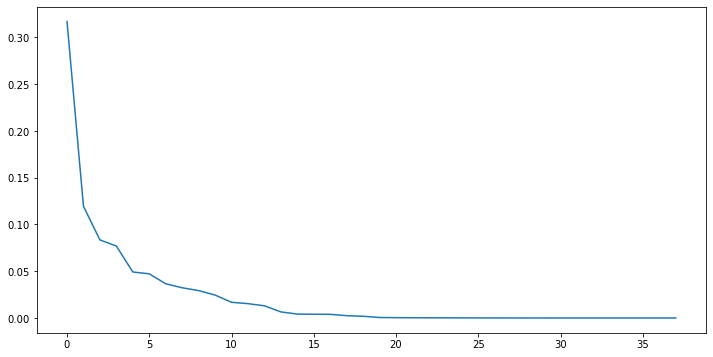

In [14]:
plt.figure(figsize = (12,6))
plt.plot(eig_val)
plt.show()

In [15]:
percent_var=[]
for i in eig_val:
    variation = (i/sum(eig_val))*100
    percent_var.append(variation)

percent_var

[35.81001503773696,
 13.49031575434967,
 9.425946230451645,
 8.684579501116254,
 5.5528404670825475,
 5.3294440373843175,
 4.133465231985229,
 3.6491389279533055,
 3.3059705321165826,
 2.766769586831191,
 1.8932720798405474,
 1.7303284721292642,
 1.4693237412122349,
 0.7329422401896347,
 0.4704020538768405,
 0.44772808104539913,
 0.44060844828666096,
 0.27482840881940895,
 0.20480926739962685,
 0.05796619106759863,
 0.037520345960094084,
 0.02882896480758568,
 0.02264383569664181,
 0.01484855998471225,
 0.009599482508002105,
 0.008756914781026052,
 0.00373973728451282,
 0.0015366850948307328,
 0.0009636960681521451,
 0.00030012543032588386,
 0.00025799287268213426,
 0.00018140021698007387,
 0.00011428938846786484,
 1.1457592084498668e-05,
 1.4378296737259303e-06,
 7.836092914085483e-07,
 3.745996742575529e-18,
 0.0]

In [17]:
np.cumsum(percent_var)

array([ 35.81001504,  49.30033079,  58.72627702,  67.41085652,
        72.96369699,  78.29314103,  82.42660626,  86.07574519,
        89.38171572,  92.14848531,  94.04175739,  95.77208586,
        97.2414096 ,  97.97435184,  98.44475389,  98.89248198,
        99.33309042,  99.60791883,  99.8127281 ,  99.87069429,
        99.90821464,  99.9370436 ,  99.95968744,  99.974536  ,
        99.98413548,  99.99289239,  99.99663213,  99.99816882,
        99.99913251,  99.99943264,  99.99969063,  99.99987203,
        99.99998632,  99.99999778,  99.99999922, 100.        ,
       100.        , 100.        ])

In [18]:
pd.Series(percent_var).cumsum()

0      35.810015
1      49.300331
2      58.726277
3      67.410857
4      72.963697
5      78.293141
6      82.426606
7      86.075745
8      89.381716
9      92.148485
10     94.041757
11     95.772086
12     97.241410
13     97.974352
14     98.444754
15     98.892482
16     99.333090
17     99.607919
18     99.812728
19     99.870694
20     99.908215
21     99.937044
22     99.959687
23     99.974536
24     99.984135
25     99.992892
26     99.996632
27     99.998169
28     99.999133
29     99.999433
30     99.999691
31     99.999872
32     99.999986
33     99.999998
34     99.999999
35    100.000000
36    100.000000
37    100.000000
dtype: float64

In [19]:
eigen_vector = eig_vec[:,0:10]
eigen_vector

array([[-6.95043856e-04, -5.33933487e-04,  1.06485299e-03,
         2.52453432e-03, -5.79615022e-04,  4.50473053e-04,
         2.58547035e-03, -1.26277208e-03,  2.28083602e-03,
        -7.24970094e-04],
       [ 1.24337181e-03, -3.52754616e-03,  1.94971284e-04,
         5.86887277e-04,  1.59809029e-03,  2.58724994e-03,
         1.21604432e-02, -1.13024778e-02, -1.70628836e-02,
         8.72683769e-04],
       [-3.07838629e-02,  4.68749695e-02,  1.41070233e-02,
         3.04952686e-02, -3.74211713e-02, -2.99827046e-02,
        -1.56365637e-01,  1.60998919e-01,  3.02921343e-01,
        -2.31777303e-02],
       [-6.04047901e-01, -6.51285590e-02, -4.06549301e-01,
        -2.79804258e-01, -2.97232438e-01, -2.17307517e-02,
         1.79480926e-01,  6.25007554e-02,  9.90357915e-03,
        -9.53746718e-03],
       [-3.59842681e-03, -4.66604743e-05,  4.14088013e-03,
        -1.02758266e-03,  2.78992505e-03,  3.86774485e-04,
        -9.67420435e-04,  1.19196493e-03, -8.95520308e-04,
         2.

In [20]:
df_pca = pd.DataFrame(np.array(x)@eigen_vector,columns = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10'])
df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,1.177778,1.545039,-1.204691,-0.859074,-0.166490,-0.661335,-0.549926,0.072661,0.236978,-0.850144
1,0.082669,1.417757,-0.418371,-1.316838,-0.351548,-0.633248,-0.180329,0.180996,0.218926,-0.868534
2,1.179204,1.545156,-1.205806,-0.856173,-0.164666,-0.660515,-0.534578,0.066593,0.246212,-0.850868
3,0.531352,1.518217,-1.279666,-0.396287,-0.714066,-0.736729,-0.378971,-0.016833,0.294489,-0.837547
4,1.047643,1.567909,-1.118716,-0.272672,-0.619735,-0.738899,-0.659337,0.140569,0.127160,-0.823453


In [21]:
df_pca.isnull().sum()

PCA1     0
PCA2     0
PCA3     0
PCA4     0
PCA5     0
PCA6     0
PCA7     0
PCA8     0
PCA9     0
PCA10    0
dtype: int64

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components = 10, random_state = 10)
x_pca_train = pca.fit_transform(x_train)
x_pca_test = pca.transform(x_test)

In [24]:
print(x_pca_train.shape)
print(x_pca_test.shape)

(163207, 10)
(69947, 10)


In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [37]:
def decisiontree_model_run(X_train, X_test, y_train, y_test):
    
    # create a decision tree classifier object
    # use 'random_state' to obtain the same results for multiple code runs
    df_tree = DecisionTreeClassifier(random_state=10)
    
    # fit the decision tree model on the train set
    df_tree.fit(X_train, y_train)
    
    # predict the target class for test set
    y_pred = df_tree.predict(X_test)
    y_pred_train = df_tree.predict(X_train)
    
    # print the accuracy score
    print('Accuracy on train set: ')
    print(accuracy_score(y_train, y_pred_train))
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))
    print('Recall on train set:')
    print(recall_score(y_train,y_pred_train))
    print('Recall on test set:')
    print(recall_score(y_test,y_pred))

In [38]:
decisiontree_model_run(x_train, x_test, y_train, y_test)

Accuracy on train set: 
0.9999387281182792
Accuracy on test set: 
0.668477561582341
Recall on train set:
0.9997180239115723
Recall on test set:
0.27860302370106294


In [39]:
decisiontree_model_run(x_pca_train, x_pca_test, y_train, y_test)

Accuracy on train set: 
0.9997181493440845
Accuracy on test set: 
0.666233004989492
Recall on train set:
0.9987875028197609
Recall on test set:
0.2638146167557932


In [41]:
def randomforest_model_run(X_train, X_test, y_train, y_test):
    
    # create a decision tree classifier object
    # use 'random_state' to obtain the same results for multiple code runs
    rf= RandomForestClassifier()
    
    # fit the decision tree model on the train set
    rf.fit(X_train, y_train)
    
    # predict the target class for test set
    y_pred = rf.predict(X_test)
    y_pred_train = rf.predict(X_train)
    
    # print the accuracy score
    print('Accuracy on train set: ')
    print(accuracy_score(y_train, y_pred_train))
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))
    print('Recall on train set:')
    print(recall_score(y_train,y_pred_train))
    print('Recall on test set:')
    print(recall_score(y_test,y_pred))

In [42]:
randomforest_model_run(x_train,x_test,y_train,y_test)

Accuracy on train set: 
0.9999387281182792
Accuracy on test set: 
0.7813487354711425
Recall on train set:
0.9998590119557862
Recall on test set:
0.03881956823133294


In [43]:
randomforest_model_run(x_pca_train, x_pca_test, y_train, y_test)

Accuracy on train set: 
0.9996691318387079
Accuracy on test set: 
0.7500107224041059
Recall on train set:
0.998900293255132
Recall on test set:
0.11005479632930613
